In [9]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [22]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Я это сделаю низкоранговым сингулярным разложением, где $к=5$ 
$$ X_k = U_kD_kV_k^T$$

In [25]:
arr_similar_users=[]
arr_lenght = np.linalg.norm(raitings, axis = 1)
arr_cos_measure = np.zeros((10, 10))
for inc1, row1 in enumerate(raitings):
    min_cos_measure = 100
    curr_user,len_curr_user = inc1,arr_lenght[inc1]
    for inc2, row2 in enumerate(raitings):
        ind_user,len_user,scalar = inc2,arr_lenght[inc2],np.dot(row1,row2)
        if inc1!=inc2:
            curr_cos_measure = round(np.degrees(np.arccos(scalar/(len_curr_user*len_user))),2)
            if curr_cos_measure < min_cos_measure:
                min_cos_measure = curr_cos_measure
                similar_user,len_similar_user,dot_scalar = ind_user,len_user,scalar
        else:
            curr_cos_measure = 100
        arr_cos_measure[inc1,inc2] = curr_cos_measure
            
    dc = dict.fromkeys(['curr_user','similar_user','min_cos_measure','len_curr_user','len_similar_user','dot_scalar'])
    dc['curr_user']=curr_user+1
    dc['similar_user']=similar_user+1
    dc['min_cos_measure']=min_cos_measure
    dc['len_curr_user']=len_curr_user
    dc['len_similar_user']=len_similar_user
    dc['dot_scalar']=dot_scalar
    arr_similar_users.append(dc)

print (arr_cos_measure)
for elem in arr_similar_users:
    print (elem)

[[100.    34.31  31.87  38.43  35.    42.17  43.33  35.94  24.4   30.67]
 [ 34.31 100.    35.67  32.18  29.38  34.19  34.28  36.85  34.38  34.95]
 [ 31.87  35.67 100.    32.15  38.38  37.72  47.46  40.28  34.8   23.26]
 [ 38.43  32.18  32.15 100.    46.25  38.13  33.62  33.97  39.01  30.81]
 [ 35.    29.38  38.38  46.25 100.    39.06  38.56  35.67  28.42  32.25]
 [ 42.17  34.19  37.72  38.13  39.06 100.    42.26  32.38  36.27  31.22]
 [ 43.33  34.28  47.46  33.62  38.56  42.26 100.    34.24  35.78  37.67]
 [ 35.94  36.85  40.28  33.97  35.67  32.38  34.24 100.    37.05  33.19]
 [ 24.4   34.38  34.8   39.01  28.42  36.27  35.78  37.05 100.    25.72]
 [ 30.67  34.95  23.26  30.81  32.25  31.22  37.67  33.19  25.72 100.  ]]
{'curr_user': 1, 'similar_user': 9, 'min_cos_measure': 24.4, 'len_curr_user': 25.553864678361276, 'len_similar_user': 28.0178514522438, 'dot_scalar': 652}
{'curr_user': 2, 'similar_user': 5, 'min_cos_measure': 29.38, 'len_curr_user': 26.814175355583846, 'len_similar_us

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).


$tg^2(sin(x) + cos(2x+3))$

$f'(x) = tg^2(sin(x) + cos(2x+3))$

#### Первая производная

$f'(x) = 2 * \frac{tg(sin(x) + cos(2x+3))}{cos^2(sin(x) + cos(2x+3))} * (cos(x)-2sin(2x+3) ) $



In [12]:
import numpy as np
from scipy.optimize import approx_fprime

In [18]:
# прямой счет через преобразование фукции в первую производную
2 * (np.tan(np.sin(1) + np.cos(2*1+3)) * (np.cos(1)-2*np.sin(2*1+3))) / (np.cos(np.sin(1) + np.cos(2*1+3))**2)


55.38591763533786

In [14]:
def func(x):
    return np.tan(np.sin(x[0])+np.cos(2*x[0]+3))**2

In [20]:
x = np.ones(1)
x[0] = 1
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps]) # f' по y в точке (1)

array([55.3859244])

### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [10]:
import numpy as np
from scipy.optimize import minimize

In [11]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [12]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [13]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

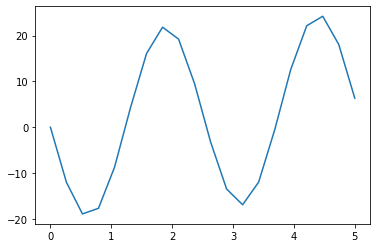

In [14]:
plt.plot(x, fx)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
x0 = np.array([1.0,-5.0])
res = minimize(error, x0, method='cobyla')
print(res)

     fun: 0.032653861952457675
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 78
  status: 1
 success: True
       x: array([ 3.0000475 , -2.49995662])


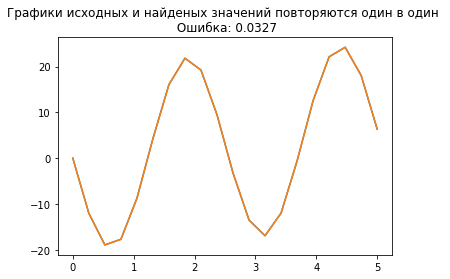

In [30]:
fx1 = f(x, *res.x)
plt.plot(x, fx)
plt.plot(x, fx1)
plt.title('Графики исходных и найденых значений повторяются один в один \n Ошибка: {}'.format(round(res.fun,4)))

plt.show()

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [9]:
from scipy.stats import binom
import seaborn as sb

Предположим, у нас 20 экспериментов в каждом повторе, с благоприятным исходом 0,4. Сгенерируем 1000 выборок размера 50 и посчитаем среднее для каждой выборки. построим гистограмму распределения средних.

In [6]:
def binom_f1():
    return binom.rvs(n=20,p=0.4,size=50).mean()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

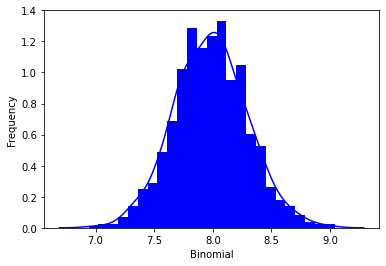

In [7]:
ax = sb.distplot([binom_f1() for x in range(1000)],
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],


[1, 1]]

In [35]:
import numpy as np

matrix = np.mat ([[1, 4], [1, 1]])
w, v = np.linalg.eig (matrix)
print (w)
print (v)
print (v * (1/0.4472136))

[ 3. -1.]
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
[[ 1.99999998 -1.99999998]
 [ 0.99999999  0.99999999]]


1. характеристическое уравнение

$l^2-2l-3=0$

2. Собственные числа 

$l_1=3$

$l_2=-1$

3. Собственные вектора (столбцы)

$v_1=[2,1]$

$v_2=[-2,1]$